<a href="https://colab.research.google.com/github/seunghee0518/R_File/blob/main/R_%EC%98%88%EC%B8%A1%EB%B0%A9%EB%B2%95%EB%A1%A0_%EC%B6%9C%EC%84%9D%EA%B3%BC%EC%A0%9C%EB%AC%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#출석과제물
>1970년 1분기 ~ 2020년 4분기까지 분기별 실질 제조업 GDP의 원계열과 계절조정계열에 대한 다음 문제에 답하시오.

## 1번
>분기 제조업 GDP의 원계열과 계절조정계열에 대한 시계열도표를 같이 그리고, 특징을 변동요인 중심으로 기술하시오.(5점)

In [ ]:
#사용할 패키지 불러오기
install.packages(c('forecast', 'mFilter'))
library(forecast)
library(mFilter)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [ ]:
#개인 깃허브 계정의 파일을 저장해 읽어옴
#  제조업 GDP, GDP  원계열
url_o = "https://raw.githubusercontent.com/seunghee0518/R_File/main/%EC%98%88%EC%B8%A1%EB%B0%A9%EB%B2%95%EB%A1%A0/%EA%B2%BD%EC%A0%9C%ED%99%9C%EB%8F%99%EB%B3%84%20GDP(%EC%9B%90%EA%B3%84%EC%97%B4%2C%20%EC%8B%A4%EC%A7%88%2C%20%EB%B6%84%EA%B8%B0)_%EC%A0%9C%EC%A1%B0%EC%97%85.csv"
gdp_o = url_o %>% read.csv() %>% ts(start=1970, frequency=4)
gdp_o %>% tail()

,gdp_m,gdp
2019 Q3,124058.6,463085.9
2019 Q4,131452.4,487427.9
2020 Q1,117204.1,443200.4
2020 Q2,112918.2,448714.8
2020 Q3,123191.8,457856.0
2020 Q4,131792.1,481478.4


In [ ]:
#  제조업 GDP, GDP  계절조정계열
url_sa = "https://raw.githubusercontent.com/seunghee0518/R_File/main/%EC%98%88%EC%B8%A1%EB%B0%A9%EB%B2%95%EB%A1%A0/%EA%B2%BD%EC%A0%9C%ED%99%9C%EB%8F%99%EB%B3%84%20GDP(%EA%B3%84%EC%A0%88%EC%A1%B0%EC%A0%95%2C%20%EC%8B%A4%EC%A7%88%2C%20%EB%B6%84%EA%B8%B0)_%EC%A0%9C%EC%A1%B0%EC%97%85.csv"
gdp_sa = url_sa %>% read.csv() %>% ts(start=1970, frequency=4)
gdp_sa %>% head()

,gdp_m_sa,gdp_sa
1970 Q1,1358.9,17109.7
1970 Q2,1440.9,17797.7
1970 Q3,1503.6,17907.8
1970 Q4,1685.2,19287.5
1971 Q1,1672.8,19395.7
1971 Q2,1747.5,20027.5


In [ ]:
#제조업 gdp 원계열, 계절조정 gdp, 계절조정계열 데이터 합치기
#제조업 gdp 원계열 : gdp_m
gdp_m_o <- gdp_o[, 1]
#제조업 계절조정 gdp : gdp_m_sa
gdp_m_sa <- gdp_sa[, 1]

#합친 데이터 : gdp
gdp <- cbind(gdp_m_o, gdp_m_sa)
head(gdp)

,gdp_m_o,gdp_m_sa
1970 Q1,1225.4,1358.9
1970 Q2,1453.9,1440.9
1970 Q3,1521.6,1503.6
1970 Q4,1787.7,1685.2
1971 Q1,1526.1,1672.8
1971 Q2,1769.2,1747.5


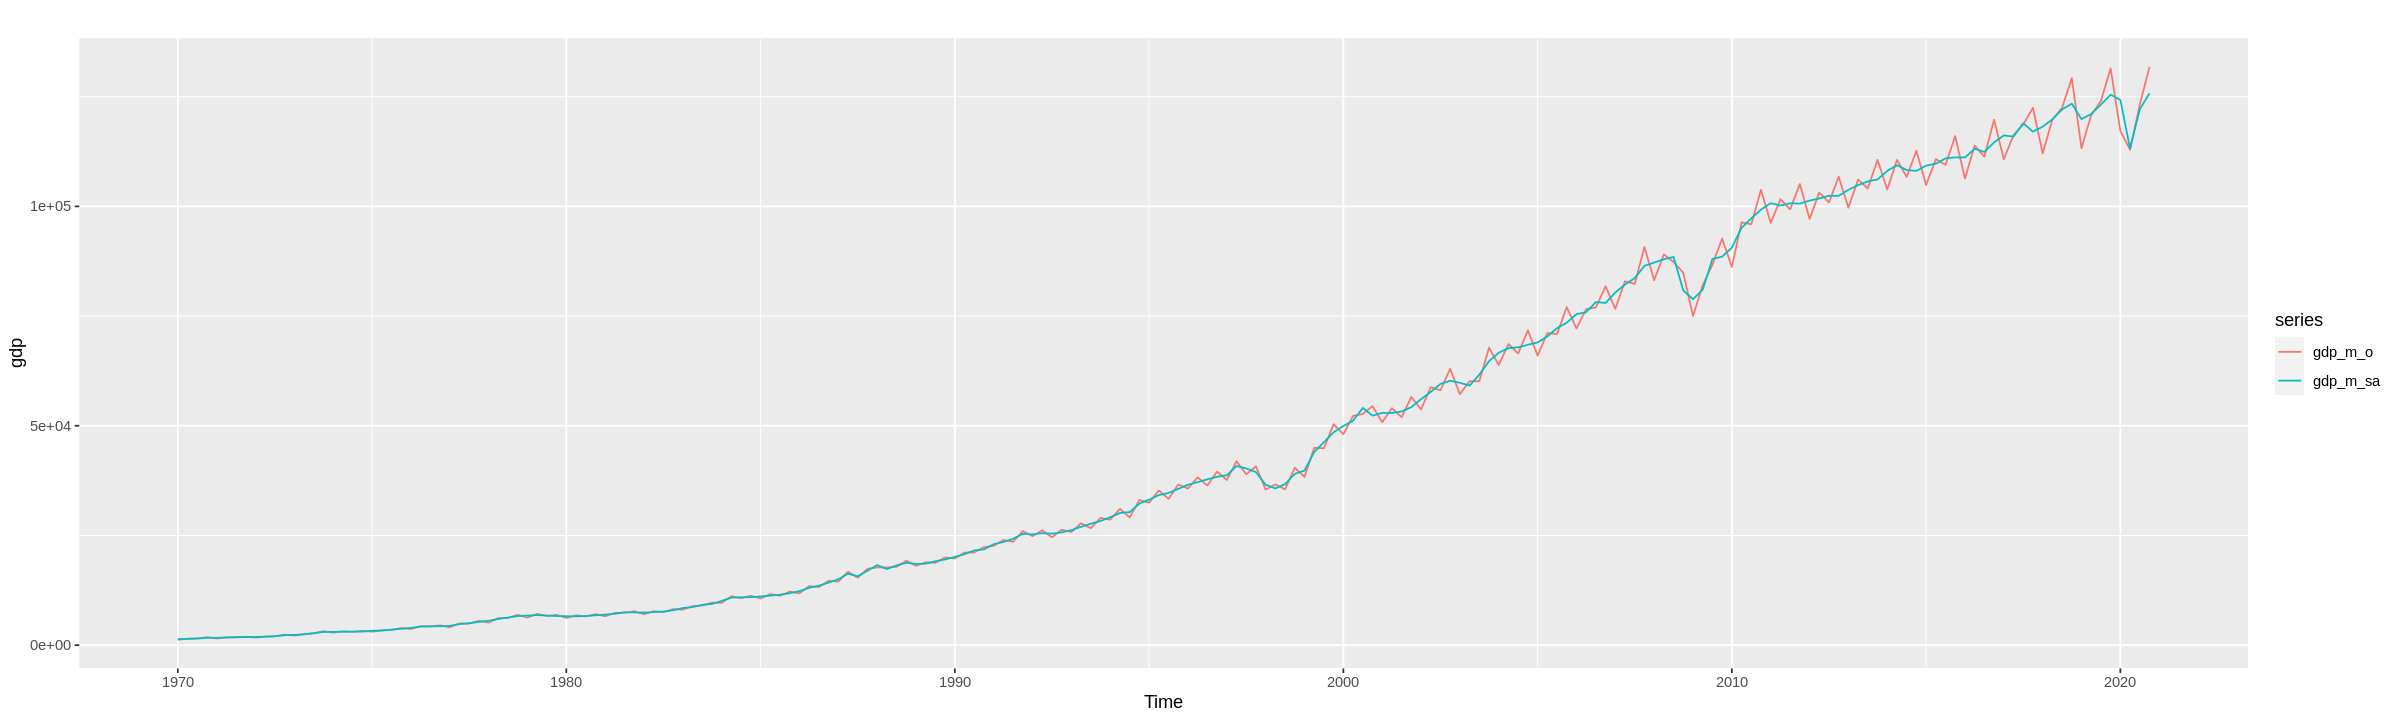

In [ ]:
#분기 제조업 GDP의 원계열과 계절조정계열 시계열도표
autoplot(gdp)
#그래프 크기 조정
options(warn=-1,repr.plot.width = 20, repr.plot.height = 6)

원계열 - 추세변동요인과 계절요인변동이 나타나며 강한 추세가 있는 불안정시계열이다
계절조정계열 - 계절변동요인은 사라짐

##2번
>분기 제조업 GDP의 원계열과 계절조정계열에 대한 스펙트럼과 같이 그래프를 표현하고 그 특징을 시계열들의 변동요인과 연계해서 설명하시오. (10점)

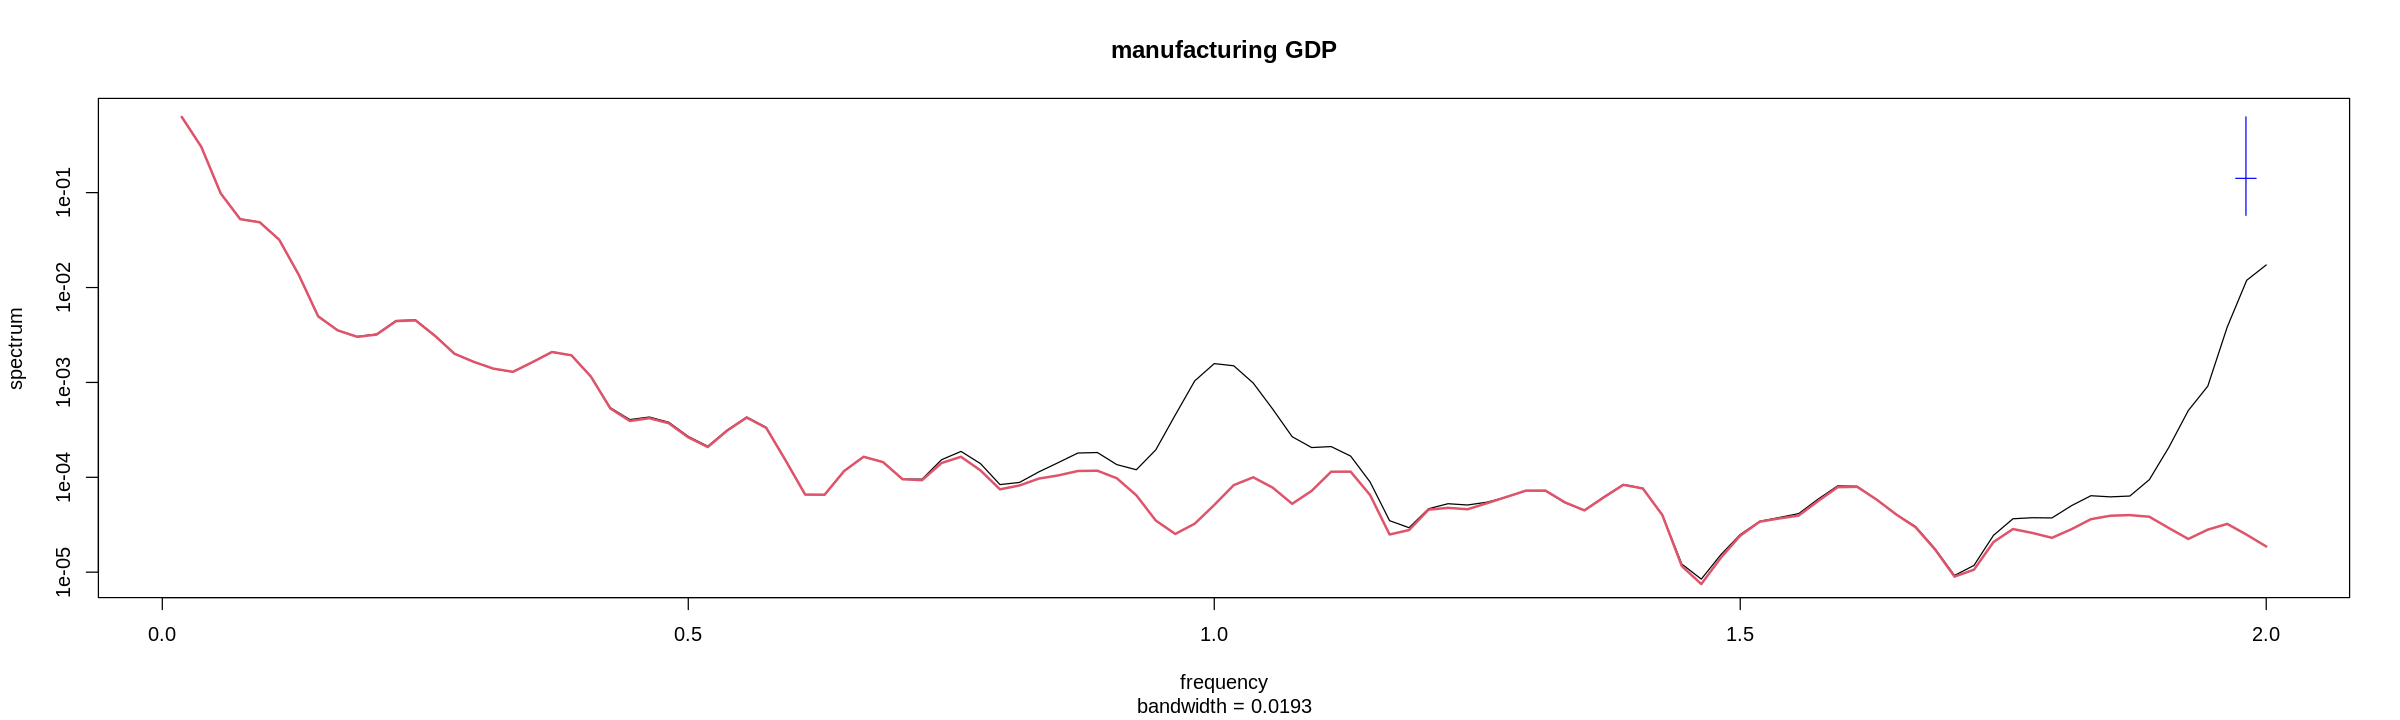

In [ ]:
gdp_m_o %>% log() %>% spectrum(spans=c(3,3), main="manufacturing GDP")
gdp_m_sa %>% log() %>% spectrum(spans=c(3,3), add=TRUE, col=2, lwd=2) 

##3번
분기 제조업 GDP의 계정조절계열의 로그 계열과 로그차분 계열에 대해 다음을 구하시오.
>
1. 두 계열의 상관도표와 부분상관도표를 작성하고 그 특징을 정리하시오.(5점)

2. 로그차분 계열의 ARIMA 모형을 작성하고, 향후 1년을 예측하시오.(10점)


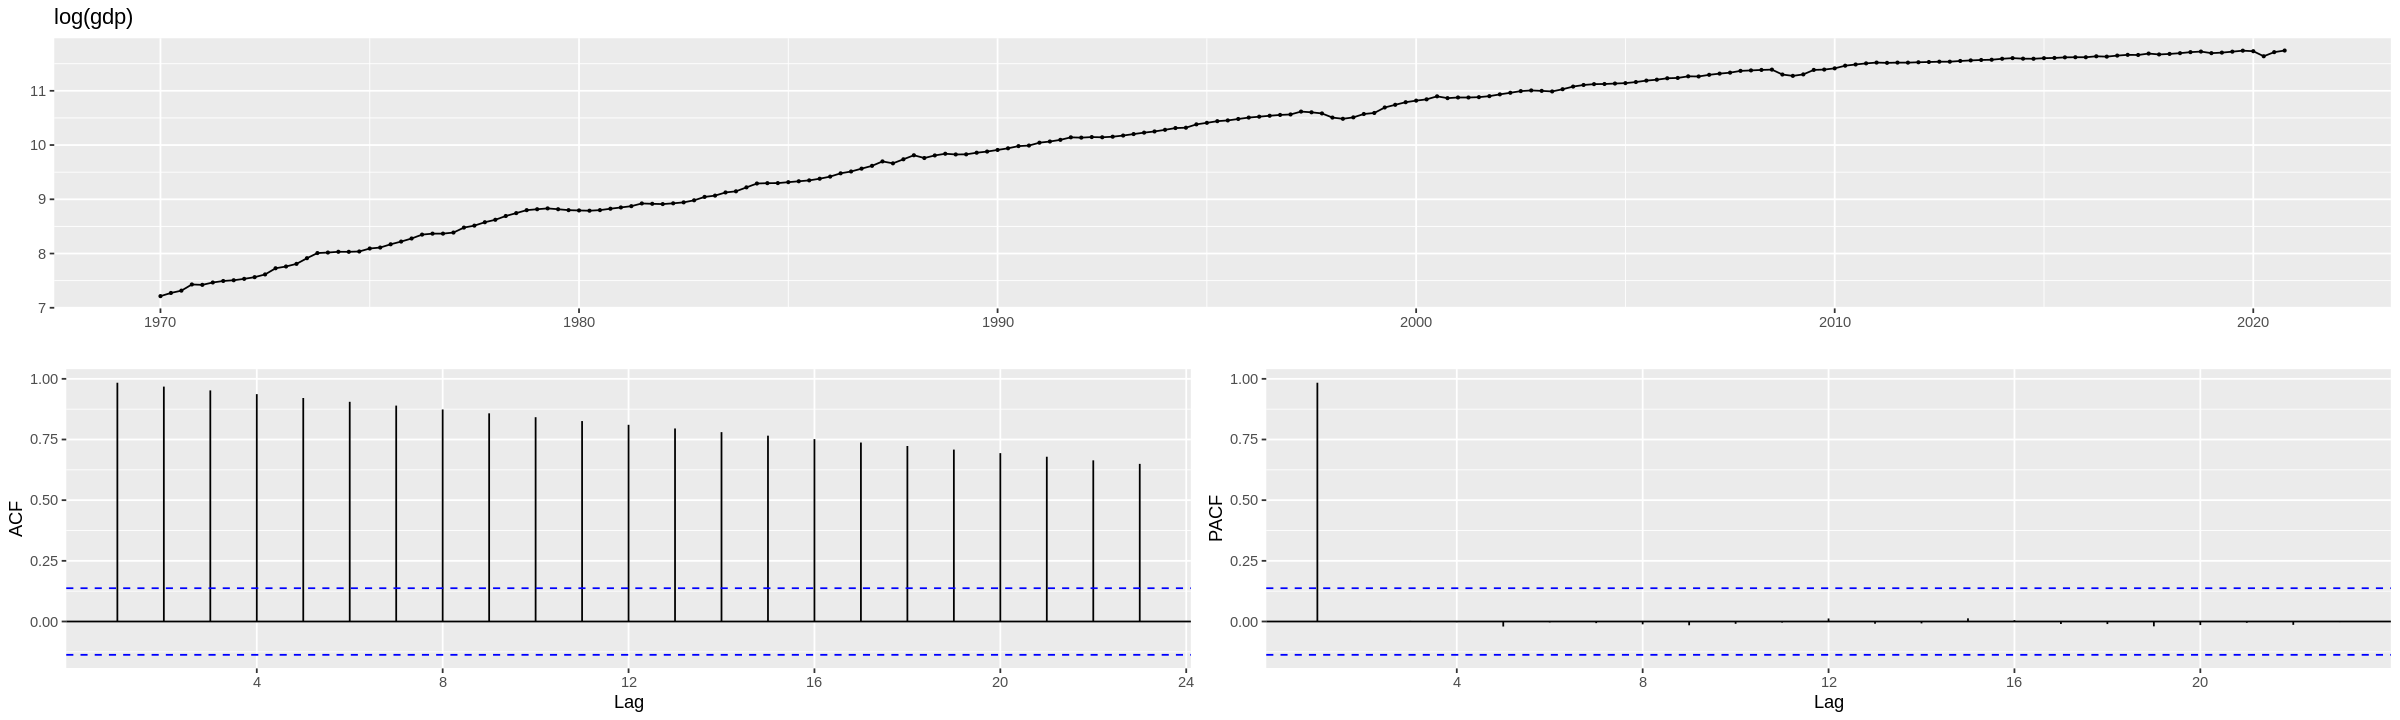

In [ ]:
#분기 제조업 GDP의 계절조정계열-로그계열의 시계열모형, 상관도표, 부분상관도표
gdp_m_sa %>% log() %>% ggtsdisplay(main="log(gdp)")

1. 두 계열의 상관도표와 부분상관도표를 작성하고 그 특징을 정리하시오.(5점)

=> 로그계열의 상관도표를 보면 자기상관계수값이 서서히 감소하는 것으로 나타나나 강한 추세

로그계열의 부분상관도표= 4기에 유의미하게 큰값을 나타내고 이후에는 모두 0과 가까운 값을 나타내고 것을 보아 추세적변동과 계절변동이 제거되었음을 의미한다



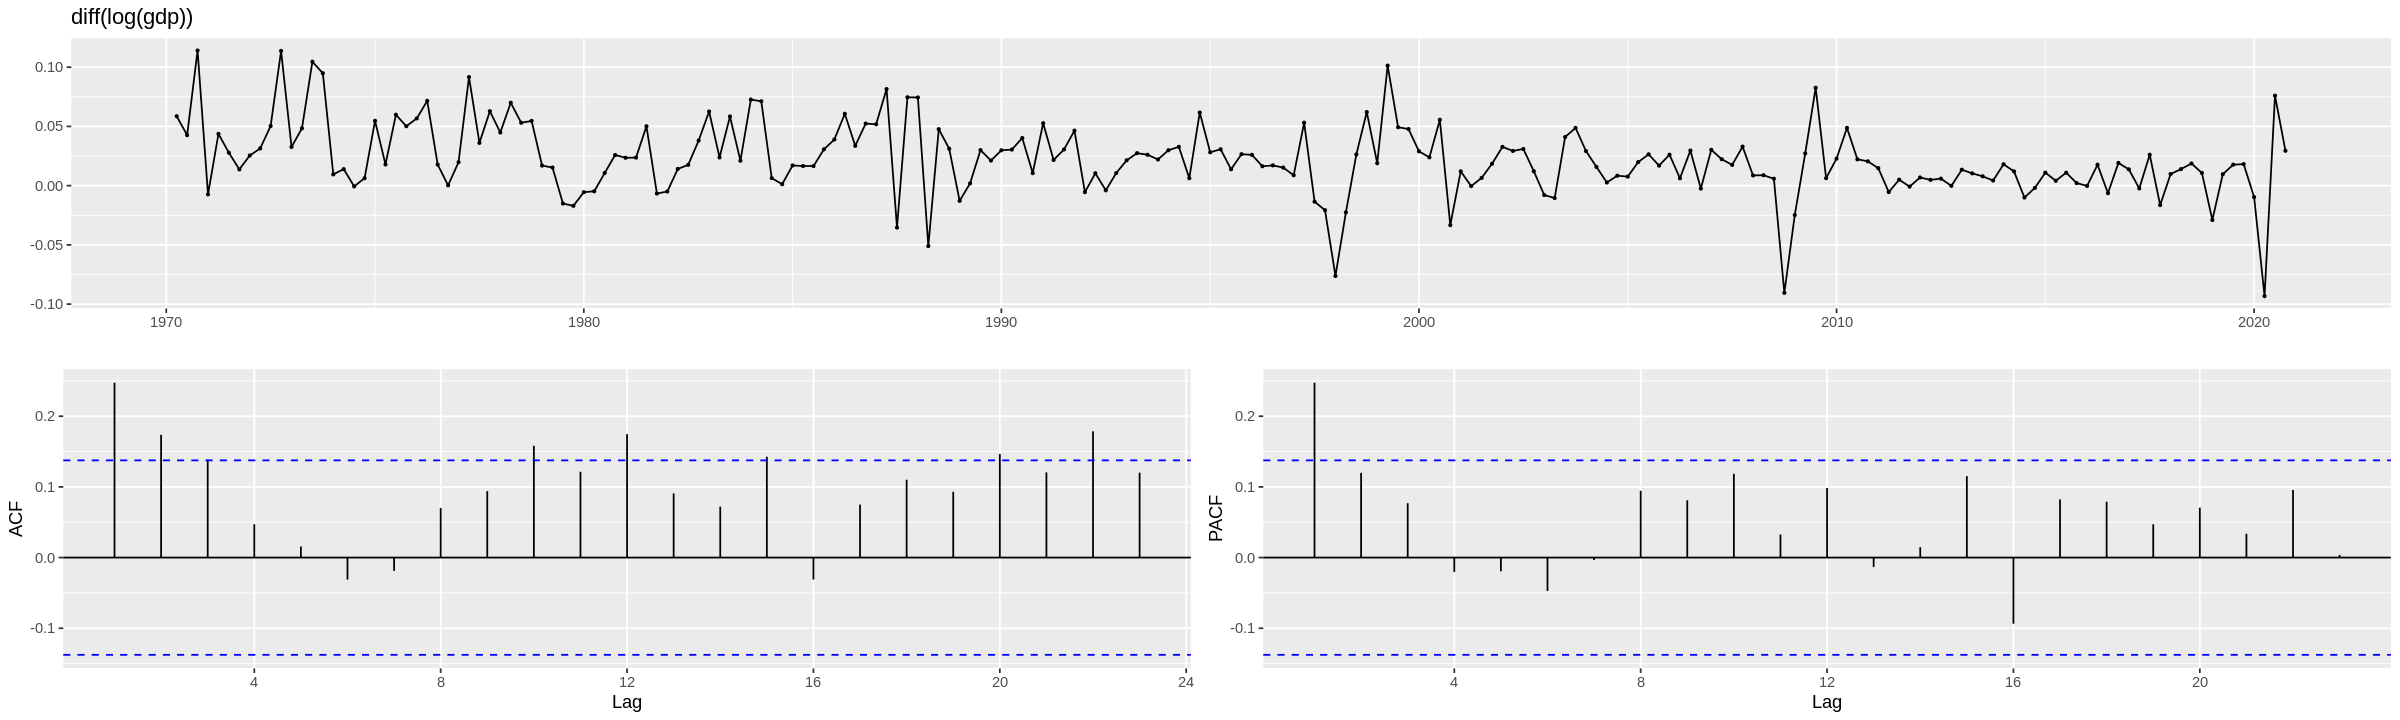

In [ ]:
#분기 제조업 GDP의 계절조정계열-로그차분계열의 시계열모형, 상관도표, 부분상관도표
gdp_m_sa %>% log() %>% diff() %>% ggtsdisplay(main="diff(log(gdp))") 

계절조정로그계열 - 자기상관계수값이 주기적으로 나타나지만 양의 상관계수값이 더 유의하다, 로그차분으로 시차가 갈수록 추세가 하락하는 모양세이다


점선인 유의수준5%의 기각역을 초과함

부분상관도표- 4차의 값이 크고 이후 차수에 주기적인 움직임이고, 자기상관계수값보다 비교적 점선아래로 값들이 있는 것을 보아  로그차분을 통해 추세는 어느정도 제거했지만 계절변동을 그대로 남아 있음 의미한다

2. 로그차분 계열의 ARIMA 모형을 작성하고, 향후 1년을 예측하시오.(10점)


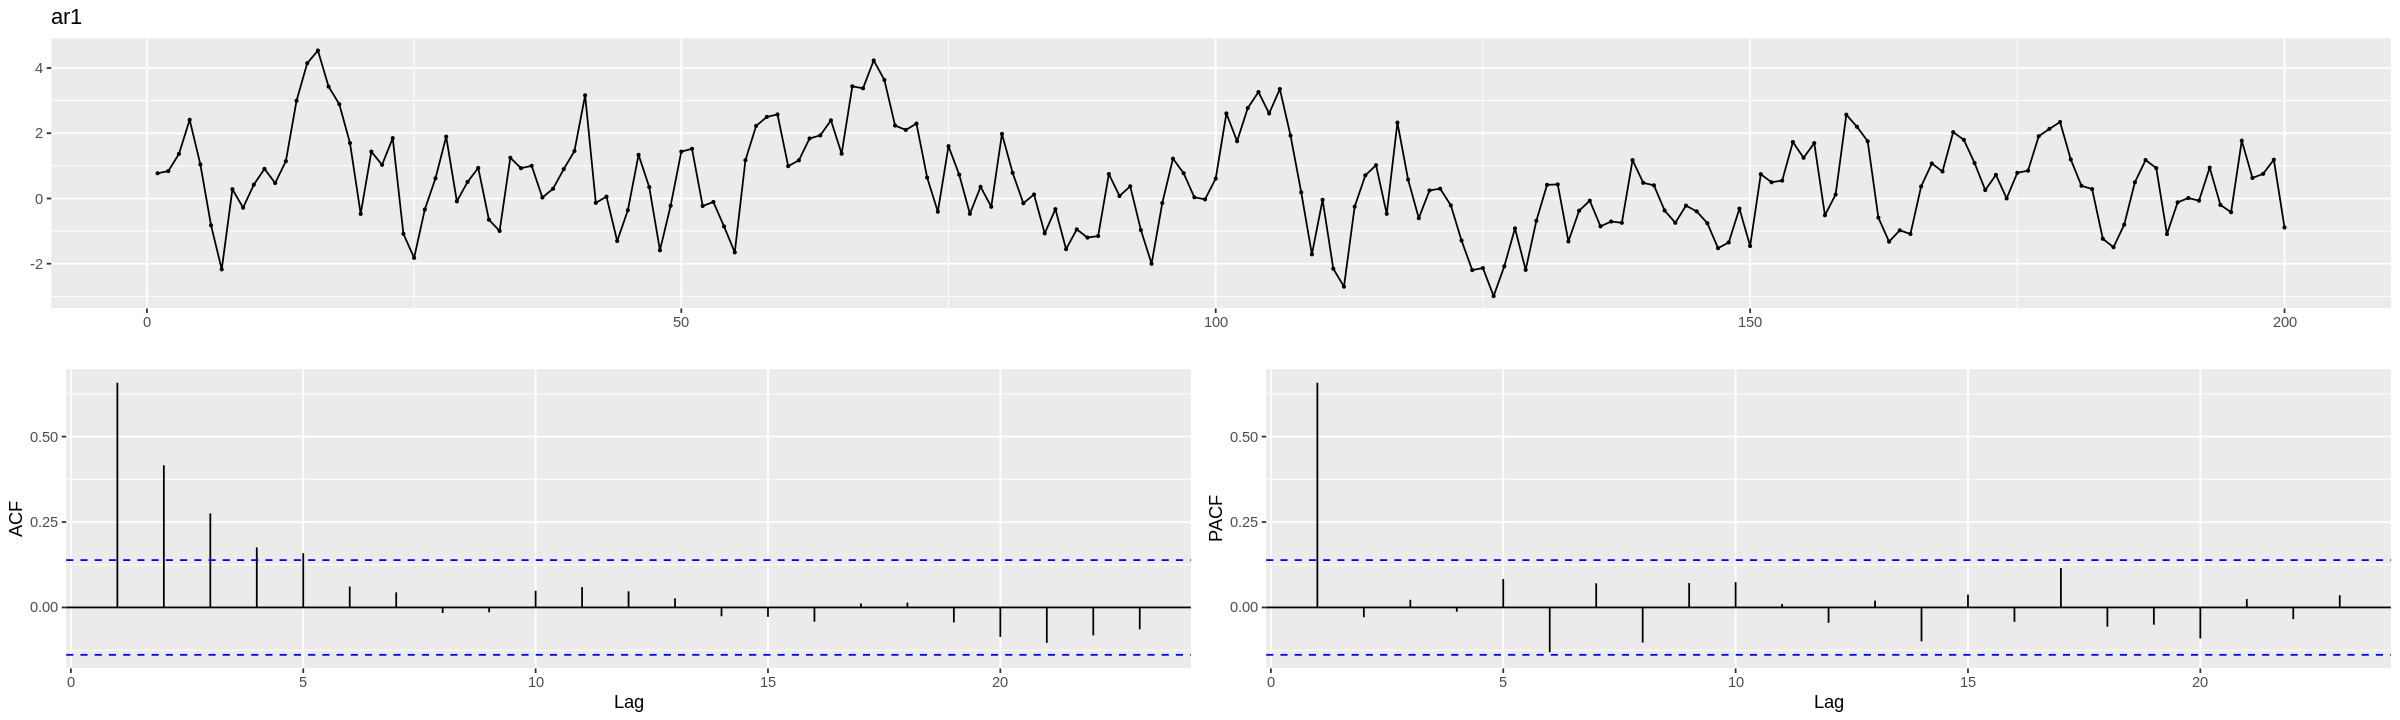

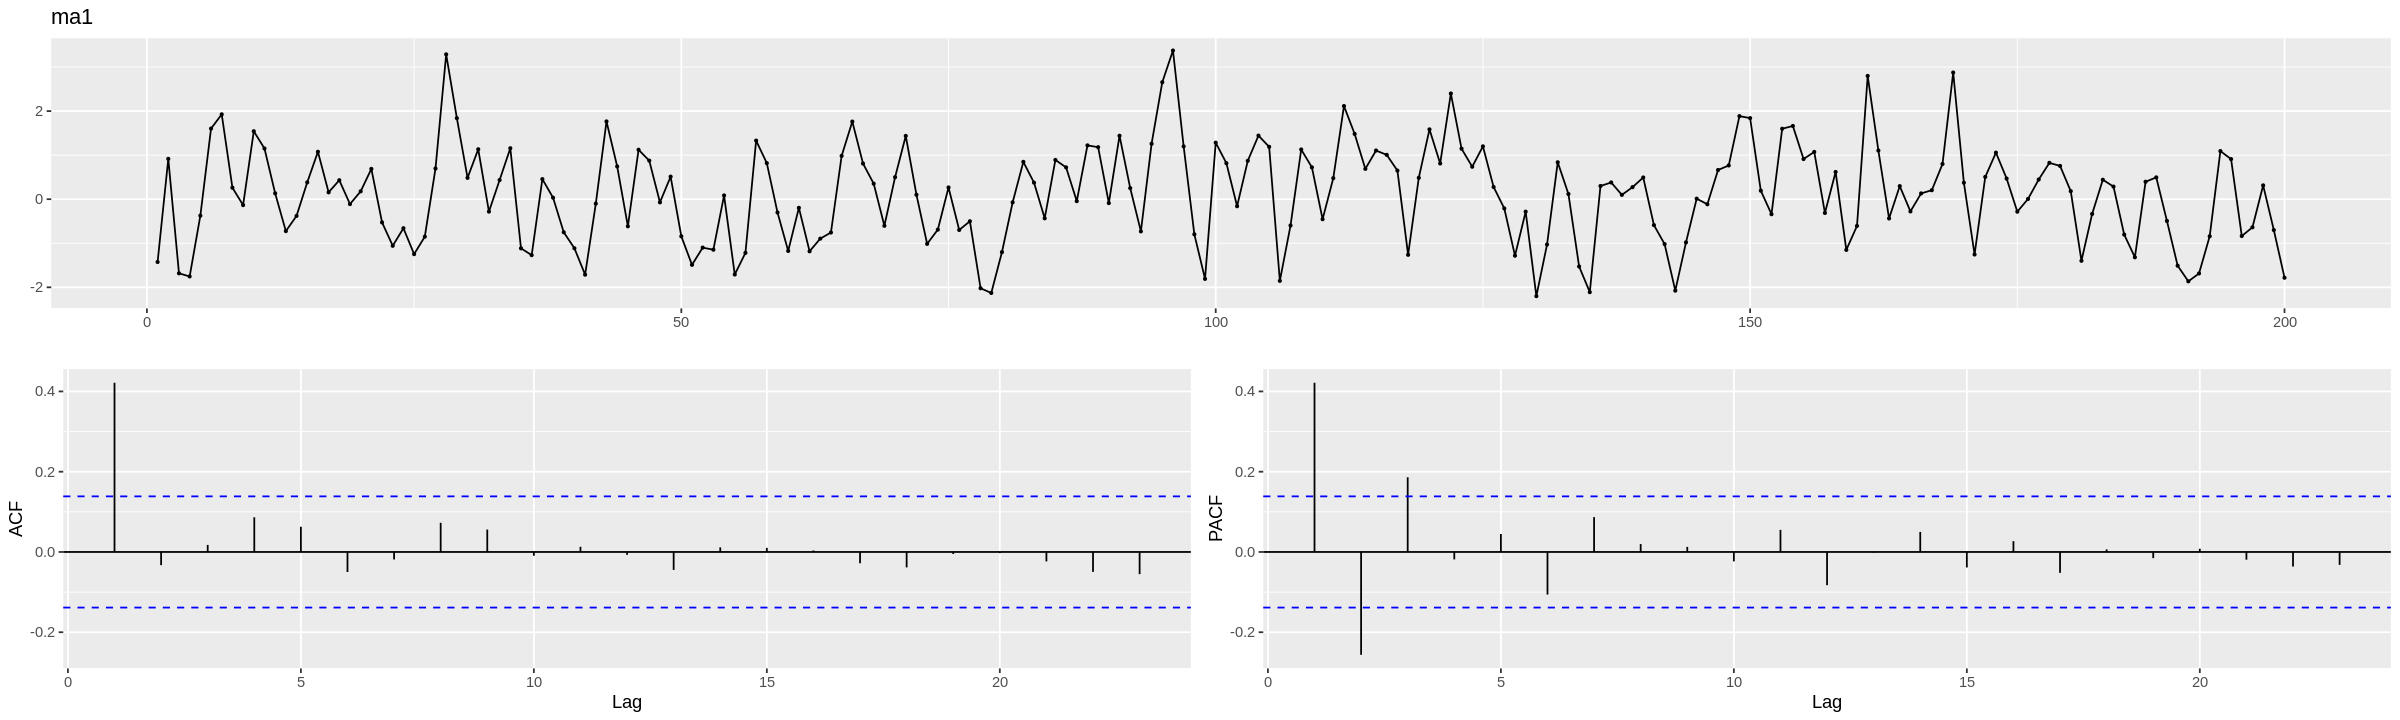

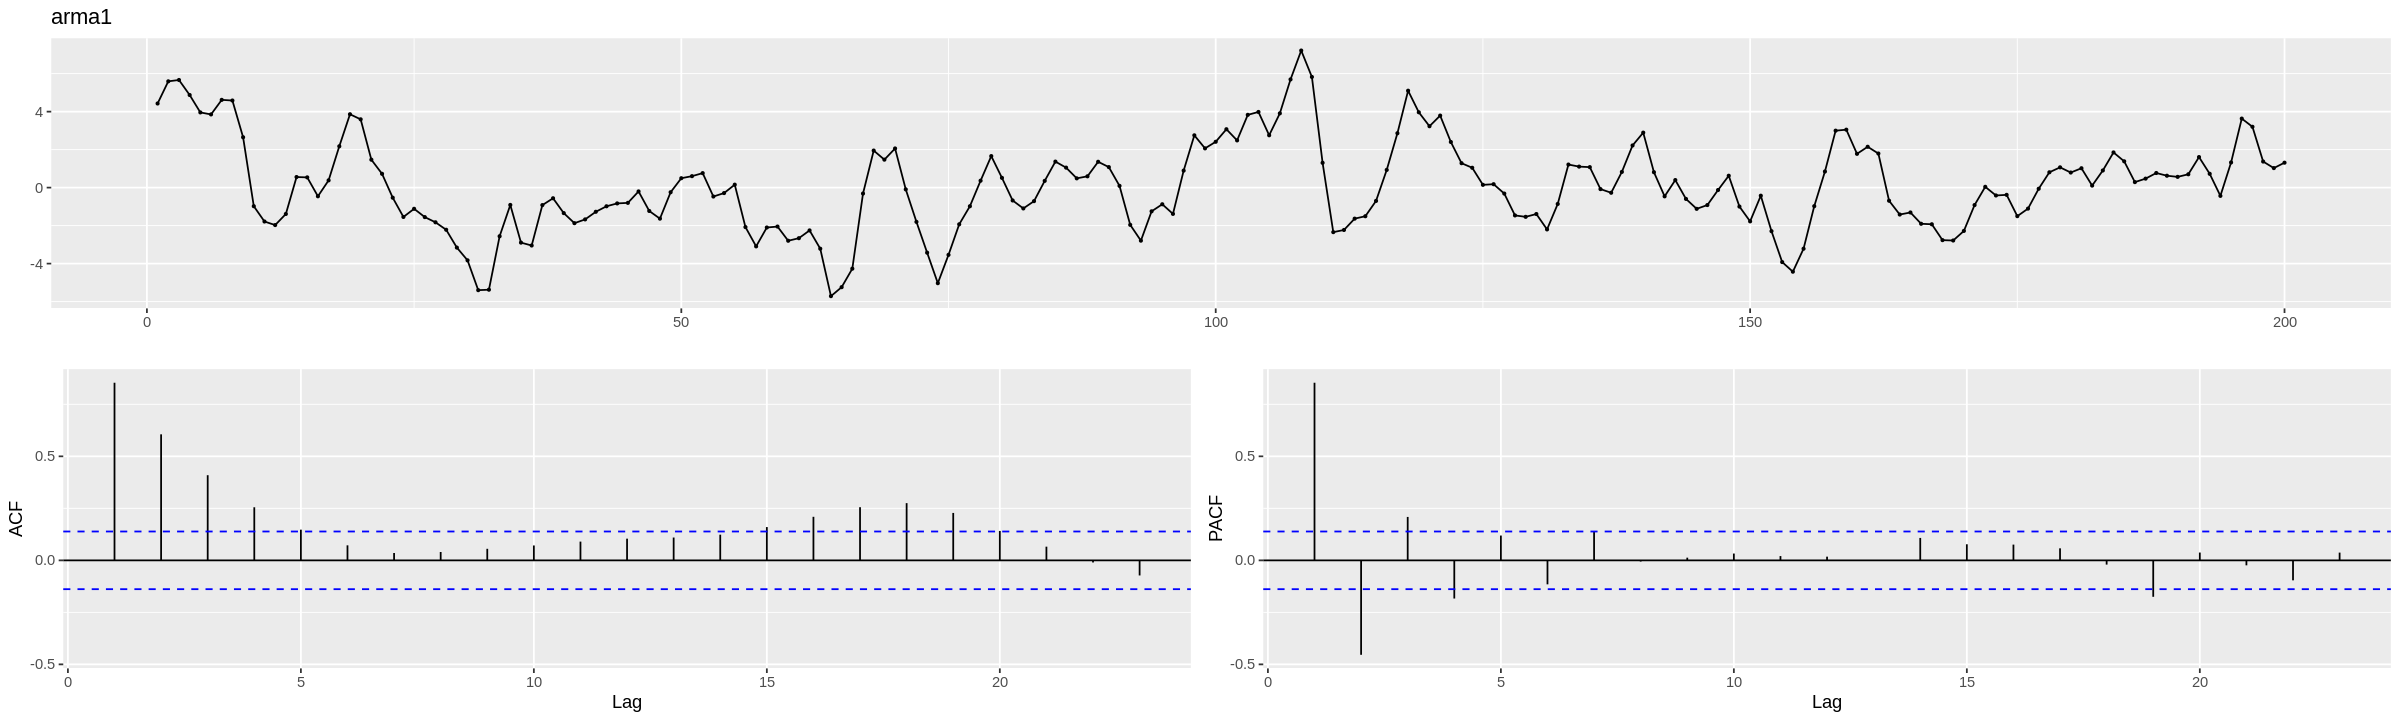

In [ ]:
set.seed(12345)
ar1=arima.sim(list(order = c(1,0,0), ar=0.7), n = 200)
ma1=arima.sim(list(order = c(0,0,1), ma=0.7), n = 200)
arma1=arima.sim(list(order = c(1,0,1), ar=0.7, ma=0.7), n = 200)
ar1 %>%  ggtsdisplay(main="ar1")
ma1 %>%  ggtsdisplay(main="ma1")
arma1 %>%  ggtsdisplay(main="arma1")